<a href="https://colab.research.google.com/github/ovodigr/neural_network_digits/blob/main/neural_network_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

neural-network


In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

11490434/11490434 [==============================] - 1s 0us/step


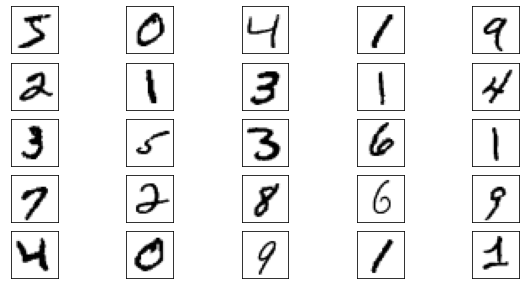

In [ ]:
# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [ ]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

print(model.summary())      # вывод структуры НС в консоль


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

model.evaluate(x_test, y_test_cat)


Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2845 - accuracy: 0.9181 - val_loss: 0.1581 - val_accuracy: 0.9542
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1257 - accuracy: 0.9632 - val_loss: 0.1085 - val_accuracy: 0.9677
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0858 - accuracy: 0.9751 - val_loss: 0.1012 - val_accuracy: 0.9686
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0648 - accuracy: 0.9803 - val_loss: 0.0909 - val_accuracy: 0.9722
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0822 - accuracy: 0.9752


[0.08221103250980377, 0.9751999974250793]

1/1 [==============================] - 0s 96ms/step
[[1.8484065e-09 1.7124675e-04 9.9816316e-01 1.6639518e-03 1.9318280e-11
  2.0682249e-07 3.9681638e-08 3.4605522e-12 1.4503435e-06 3.1082689e-11]]
2


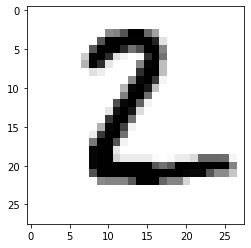

In [ ]:
n = 1
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print( np.argmax(res) )

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [ ]:
# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])


313/313 [==============================] - 1s 2ms/step
(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [ ]:
# Выделение неверных вариантов
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = x_test[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True False  True]
(248, 28, 28)


d= 7


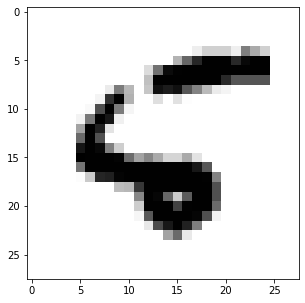

d= 2


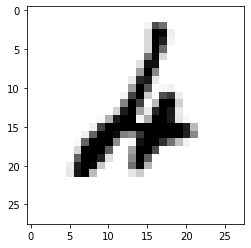

d= 1


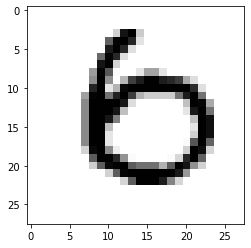

d= 0


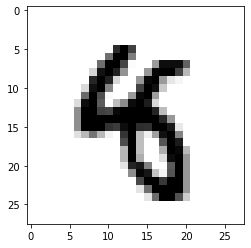

d= 4


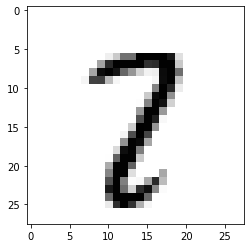

d= 1


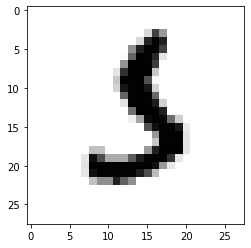

d= 4


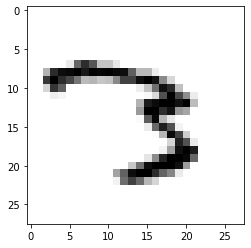

d= 9


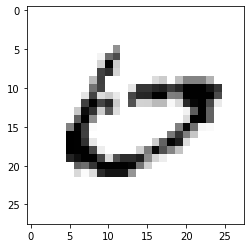

d= 5


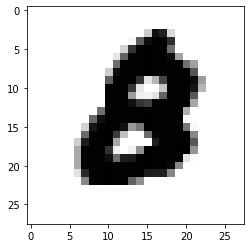

d= 9


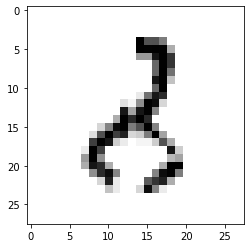

d= 0


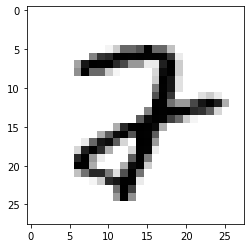

d= 6


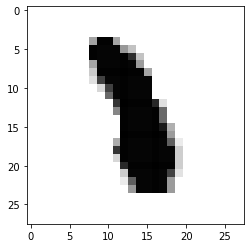

d= 9


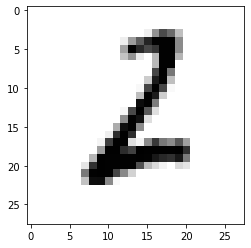

d= 0


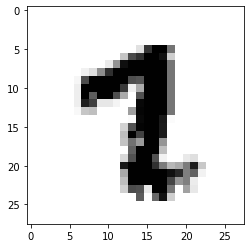

d= 1


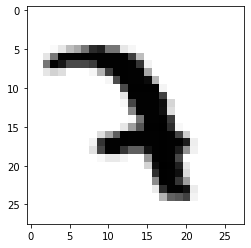

d= 5


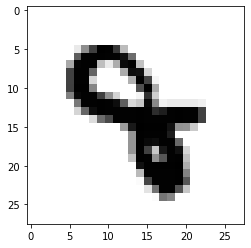

d= 9


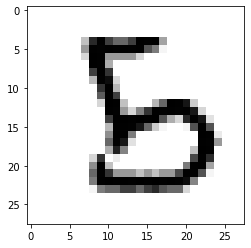

d= 7


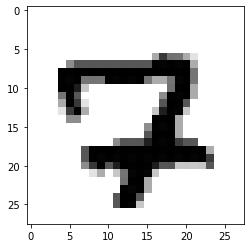

d= 3


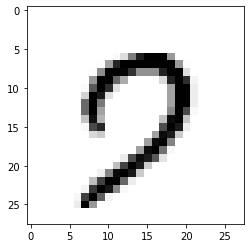

d= 4


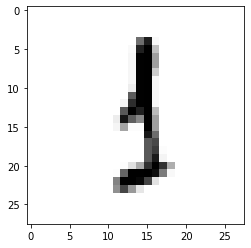

d= 9


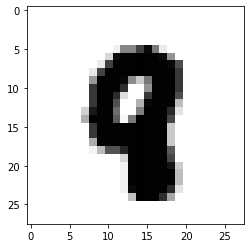

d= 6


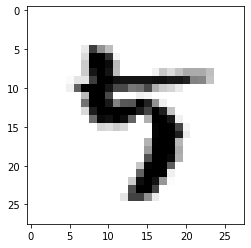

d= 6


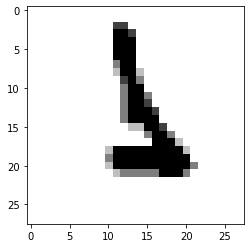

d= 5


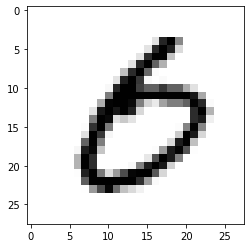

d= 4


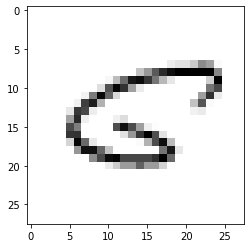

In [ ]:
# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    print("d=", str(y_test[i]))
    #plt.subplot(5,5,i+1)
    #plt.xticks([])
    #plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.show()